# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.datasets import load_iris
import seaborn as sns
iris = sns.load_dataset('iris')

'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
#iris = pd.read_csv("iris.csv")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# (Q) how many data-points and features?
print ("Number of data-points:",iris.shape[0])

# How many features do we have?
print ("Number of features:",iris.shape[1]-1)

Number of data-points: 150
Number of features: 4


In [ ]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

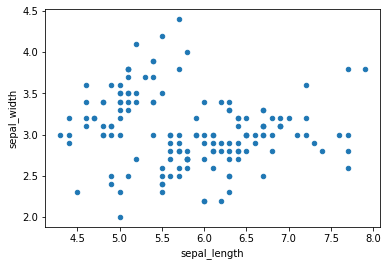

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


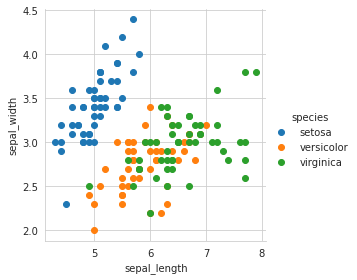

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


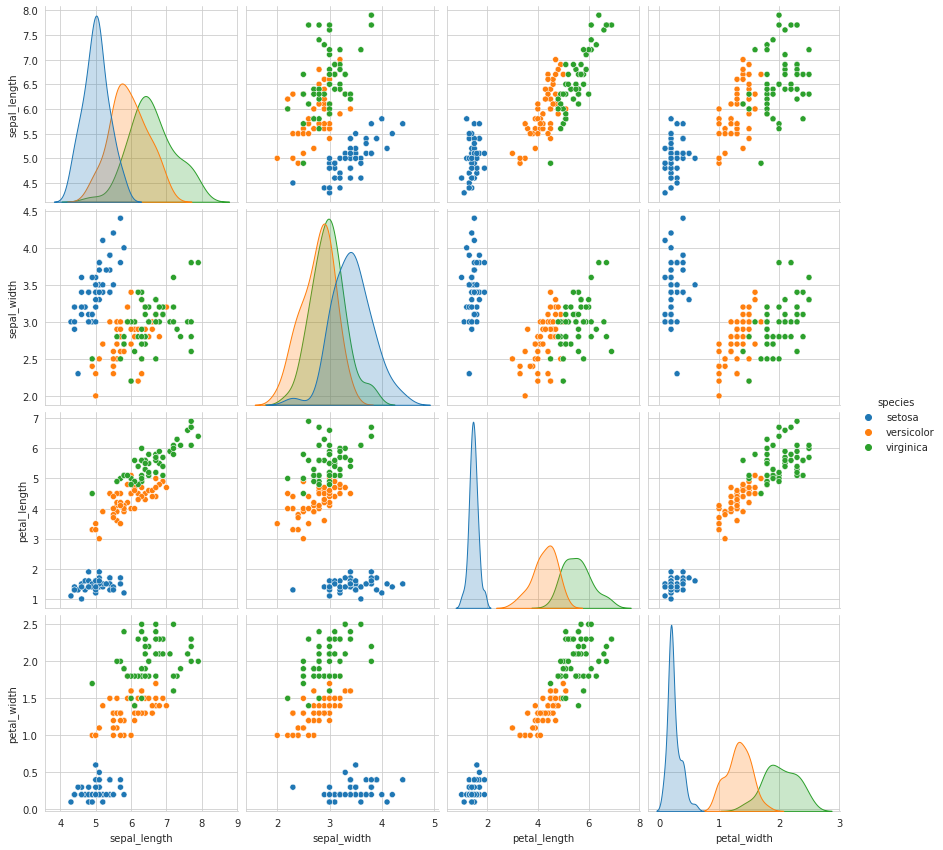

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

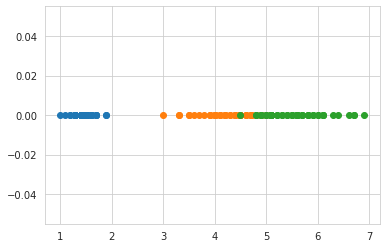

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

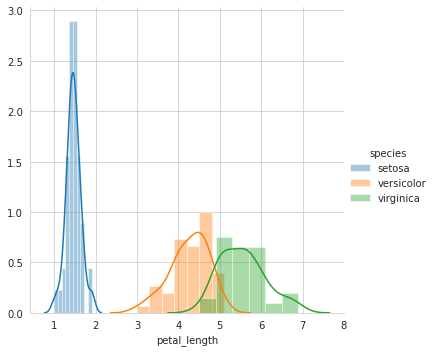

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

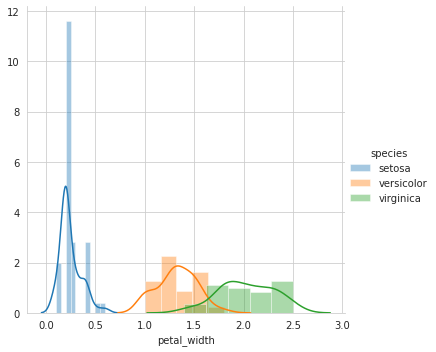

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

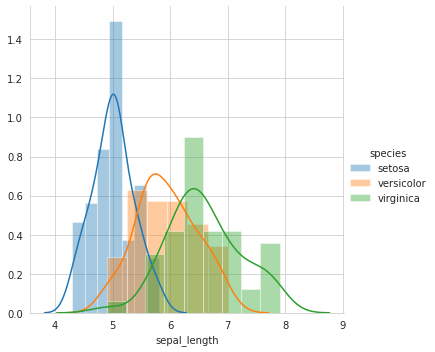

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

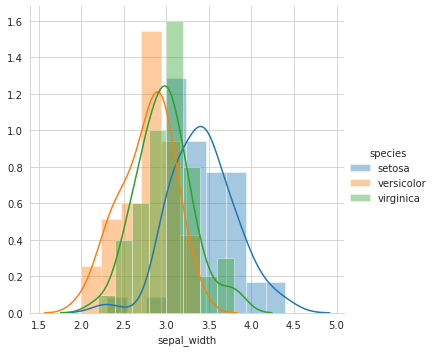

In [ ]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


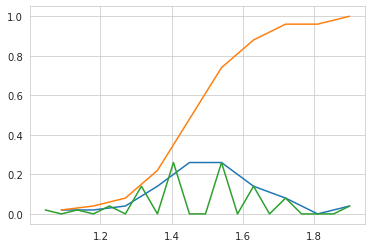

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


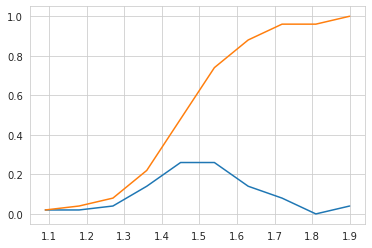

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


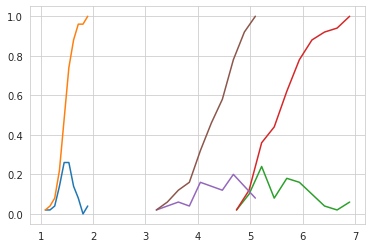

In [ ]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.4620000000000002
2.4137254901960787
5.552
4.26

Std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# (3.7) Box plot and Whiskers

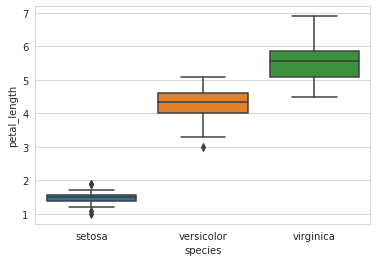

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

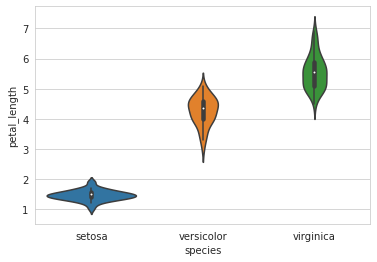

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

In [ ]:


Def: Univariate, Bivariate and Multivariate analysis.


SyntaxError: invalid syntax (<ipython-input-20-f25211abae88>, line 3)

# (3.11) Multivariate probability density, contour plot.


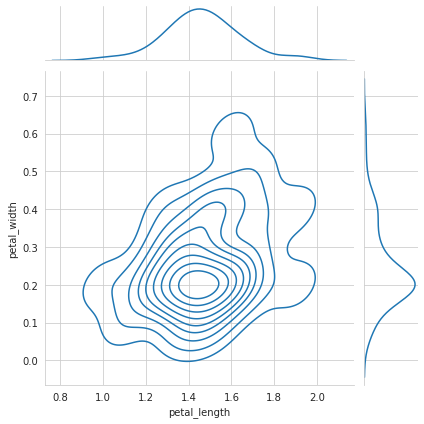

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [ ]:
# import all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# naming the columns in the data set as they were original un-named in the data set
'''
1st Column specifies the age of patient, 2nd column specifies year of operation of patient starting from 19's
3rd Column specifies the number of positive axillary nodes detected and the 4th column specifies that whether the 
patient survived or did not survive more than 5 years.
'''


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load haberman.csv into a pandas dataFrame.


haberman = pd.read_csv('haberman.csv',names=['Age','Op_Year','axil_nodes','Survival_Status'])
print(haberman)


     Age  Op_Year  axil_nodes  Survival_Status
0     30       64           1                1
1     30       62           3                1
2     30       65           0                1
3     31       59           2                1
4     31       65           4                1
..   ...      ...         ...              ...
301   75       62           1                1
302   76       67           0                1
303   77       65           3                1
304   78       65           1                2
305   83       58           2                2

[306 rows x 4 columns]


In [ ]:
#Let's find out the number of data-points and features in our dataset
print (haberman.shape)

#Now let's find and confirm the column names in our dataset
print (haberman.columns)

(306, 4)
Index(['Age', 'Op_Year', 'axil_nodes', 'Survival_Status'], dtype='object')


In [ ]:
"""Now we will find how many data points for each classes are present, i.e. get an idea how the survival rate is 
distributed across the entire dataset and whether our dataset is balanced or imbalanced."""

haberman['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [ ]:
#Get more information about the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Op_Year          306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
"""Here it will be easier for us to visualize the data, if we encode the output variables to something more meaningfull.
For this problem, I have just renamed the 1s and 2s to Yes and No respectively and explicitly defined them as categories."""
#Source : https://pandas.pydata.org/pandas-docs/stable/categorical.html"""

haberman["Survival_Status"] = haberman["Survival_Status"].map({1:"Yes", 2:"No"})
haberman["Survival_Status"] = haberman["Survival_Status"].astype("category")

#Let's verify what we have done here
haberman['Survival_Status'].value_counts()

Yes    225
No      81
Name: Survival_Status, dtype: int64

In [ ]:
#Let's get an idea about the high level statistics of the haberman dataset
haberman.describe()


,Age,Op_Year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**High Level statistics of the haberman dataset**

1.The dataset contains 306 records, with 3 features (Age, Axillary_Nodes, 
Operation_Year) and one class label (Survival_Status)
The dataset is imbalanced with the class ariable containing 225 (73.6%) 
patients who has survived more than 5 years and 81 (26.4%) patients who didn't.

2.The median age of all the patients is 52, with the patient's age varrying from 30 to 83 years.
Almost 75% of the patients are less than 61 years of age and were operated before 1966.

3.The maximum number of Axillary nodes obeserved in a single patient is 52 and the minimum is ofcourse 0.
Almost 75% patients has less than 5 axillary nodes, and 25% patients has 0 axillary nodes. This is quite less compared to the maximum number of axillary nodes observed in a patient, that is 52.

4.Most of the operations has taken place between 1960 and 1966. As of now, the operation year might not have a significance on the survival of the patients. But considering how medical science has evolved over the years, we might be able to find some co-relation between the operation year and the survival rate of patients.

**Objective**:

Our mission here is to determine whether or not a patient is going to survive more than 5 years based on the given data : his age, year of operation and the number of postive axillary nodes detected. Basically, we will need to study the co-relations between the different features and the output variable.



**Univariate analysis of the feature variables using Histogram, PDF, CDF, Box Plots and Violin Plots.**

Here we will use distribution plots to visualize how the data points are distributed with respect to their frequencies. Generally we take the data points in the X-Axis, and the height of the plot signifies what is the frequency of each data point. The spread represents how widely the data points are distributed on either side of the median value. We need distribution plots to visually see the data and understand any patterns in the given data. Distribution plots will give us an idea how the data is distributed in a 2D space and we can more easily come to a conclusion in a more robust and quantitative manner, just by visually looking at the distribution which would not have been possible just by seeing the High Level Statistics of the data.

1.First we plot a Histogram : In a histogram the data points are grouped into bins. Each of these bins represents one single group of data. The heights of these bins gives us an idea about the frequency of data lying in a particular interval, i.e. that group. If more data points are added to a bin (our group of data) then the height of the bins increases. This further means that the frequency of the data lying in that particular bin increases. Thus in general height represents the percentage of data points falling in that interval.

2.Probability Density Function (PDF) : This is actually a smoothed form of histogram. Tells us how dense each of the regions are. In other words PDF generally tells what is the probability of any data point belonging to a particular range in X-Axis. It is maximum in the middle and decreases on either ways. So if we want to build a model using only one particular feature we can make use of this histogram or PDF. Please note that the area under the PDF curve is always 1 unit.

3.Cumulative Distribution Function (CDF) : CDF is nothing but an integral sum of the area under the curve enclosed by the PDF. Using CDF we can find things like what percentage of data points are likely to be less than a given value in X-Axis.

Box Plots : A box plot sumarizes informations about the following key things in our data.
  1. The 25th, 50th(also called the median) and 75th percentile values of our distribution.
  2. The Inter Quantile Range (IQR) -> 75th percentile - 25th percentile
  3. The spread of the whiskers is measured by (75th percentile + 1.5*IQR) and (25th percentile - 1.5*IQR)
  4. Any outliers in the dataset are displayed as points outside the box. Outliers are mostly exceptions which does not have a huge significance on our prediction.
  5. Note : An outlier is an observation that is numerically distant from the rest of the data. The are called outliers because they "lie outside" the range in which we expect them. 
     When reviewing a boxplot, an outlier is defined as a data point that is located outside the fences (“whiskers”) of the boxplot (e.g: outside 1.5 times the interquartile range 
     above the upper quartile and bellow the lower quartile)




**Violin Plots :** Violin Plots are a combination of PDFs and Box Plots in one single figure, thus allowing us more flexibility. It gives us almost all the tools that we need to visualize our data.

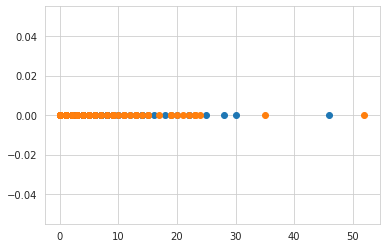

In [ ]:
#Plotting a 1-D Scatter plot
survival_yes = haberman.loc[haberman["Survival_Status"] == "Yes"]
survival_no = haberman.loc[haberman["Survival_Status"] == "No"]
sns.set_style("whitegrid");

#1-D Scatter plot Axillary_Nodes
plt.plot(survival_yes["axil_nodes"], np.zeros_like(survival_yes['axil_nodes']), 'o')
plt.plot(survival_no["axil_nodes"], np.zeros_like(survival_no['axil_nodes']), 'o')
plt.show()

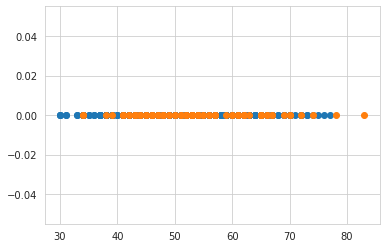

In [ ]:
#1-D Scatter plot of Age
plt.plot(survival_yes["Age"], np.zeros_like(survival_yes['Age']), 'o')
plt.plot(survival_no["Age"], np.zeros_like(survival_no['Age']), 'o')
plt.show()

**Observations from the two 1-D Scater plots :**

1.From the scatter plot of Axillary Nodes, we can say that most patients having Axillary Nodes less than 15 has survived.

2.From the scatter plot of Age, we can say that Most people aged 42-58 has survived.

3.However, at this point it's very hard for us to strictly say that the above observations are correct. We will analyse further using Histograms, PDFs and CDFs to come to more robust conclusion.

In [ ]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


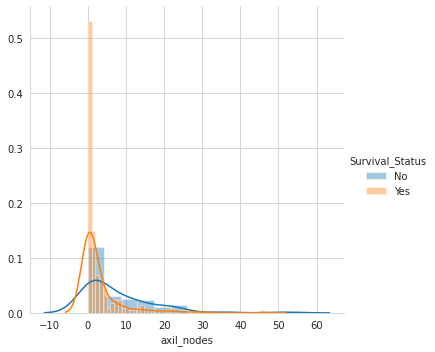

In [ ]:
#Histogram of Axillary_Nodes
sns.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sns.distplot, "axil_nodes").add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


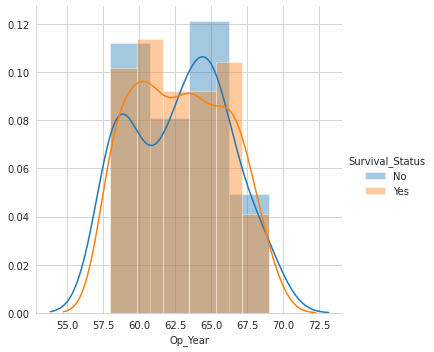

In [ ]:
#Histogram of Operation_Year
sns.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sns.distplot, "Op_Year").add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


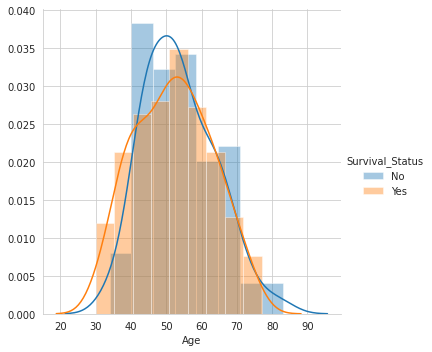

In [ ]:
#Histogram of Age
sns.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sns.distplot, "Age").add_legend();
plt.show();

**Observations from the Histogram :**

1.From the above Histogram we can see that there is a massive overlap observed between survival statuses when we take Age and Operation_Year as our X-Axes in two seperate plots. So we cannot strictly come to a conlusion on how to seperate these two features.

2.However, in case of number of Axillary Nodes we can see that most patients who has less than 5 axillary nodes has survived since the number of axillary nodes of all the patients who has survived is most dense in the region 0 to 5.

3.The survival status of patients having more than 5 axillary nodes has drastically reduced on increases of the number of axillary nodes. For example if we consider the number of nodes to be between 5 and 10, we can clearly see that the survival rate has dropped by almost 91% than what it was in the interval of 0 to 5 axillary nodes.

4.The survival rate drops to almost 0% (approx), i.e. it's almost certain that a person is going to die when the number of axillary nodes detected is roughly more than 30"

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


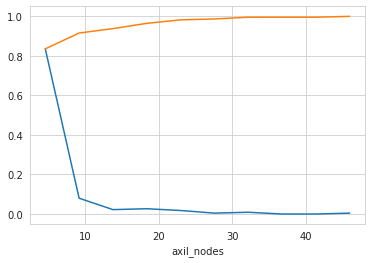

In [ ]:
"""Plot PDF and CDF of Axillary Nodes"""

#PDF
counts, bin_edges = np.histogram(survival_yes['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("axil_nodes")
plt.show();


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


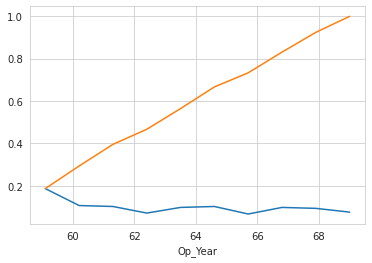

In [ ]:
"""Plot PDF and CDF of Operation Year"""

#PDF   
counts, bin_edges = np.histogram(survival_yes['Op_Year'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Op_Year")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


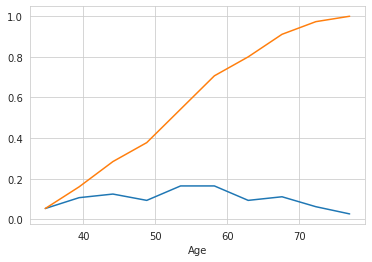

In [ ]:
"""Plot PDF and CDF of Age"""

#PDF
counts, bin_edges = np.histogram(survival_yes['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.show();

**Observations from the above PDFs and CDFs :**

a.Nearly 80% survivors has number of axillary nodes detected less than or equal to 5.

b.Nearly 2.5% of the survivors has number of axillary nodes detected between 20 and 30.

c.Nearly 1% of the survivors has number of axillary nodes detected more than 30.

d.Almost 77% survivors are less than 60 years of age and almost 18% survivors are less than the age 40.

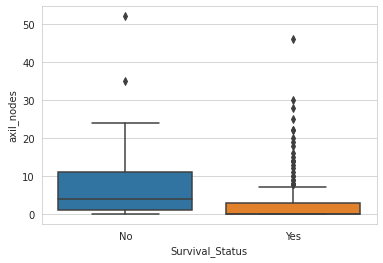

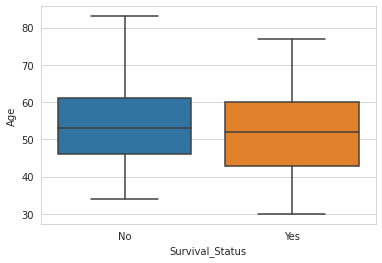

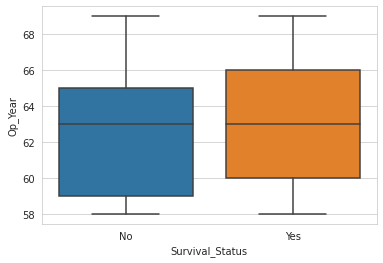

In [ ]:
""" Plotting a Box-Plot to get a visualization of the Median, IQR and the distribution of the values"""

#Box Plot for the feature Axillary_Nodes
sns.boxplot(x = 'Survival_Status', y ='axil_nodes', data = haberman)
plt.show()

#Box Plot for the feature Age
sns.boxplot(x = 'Survival_Status',y = 'Age', data = haberman)
plt.show()

#Box Plot for the feature Operation_Year
sns.boxplot(x = 'Survival_Status', y = 'Op_Year', data = haberman)
plt.show()

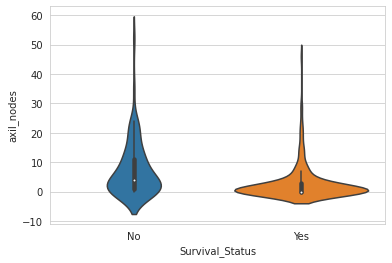

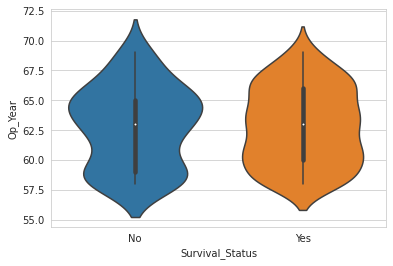

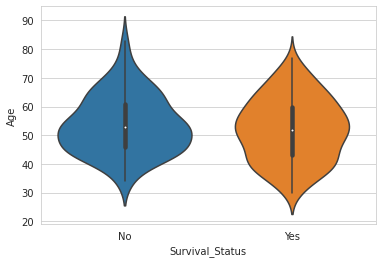

In [ ]:
#Violin Plots for Axillary_Nodes
sns.violinplot(x = "Survival_Status", y = "axil_nodes", data = haberman, size = 8)
plt.show()

#Violin Plots for Operation_Year
sns.violinplot(x = "Survival_Status", y = "Op_Year", data = haberman, size = 8)
plt.show()

#Violin Plots for Age
sns.violinplot(x = "Survival_Status", y = "Age", data = haberman, size = 8)
plt.show()

**Observations from the above Box Plotand Violin Plots :¶**

1.The chances of survival of the patients are slightly better when they are treated after the year 1966 and the number of survivors are slightly less when they were treated before 1959.

2.People below the age of 45 mostly survived. People beyond the age of 60 mostly died.

**Bi-variate analysis of the feature variables using Pair Plots.**

1.Pair Plots : Pair Plots are nothing but combinations of pair wise scatter plots. Here we have 3 features and we will select 2 of them each time. So the total number of combinations of pair plots will be 3C2 that is equal to 3. The diagnal are nothing but the Histograms of each pair.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


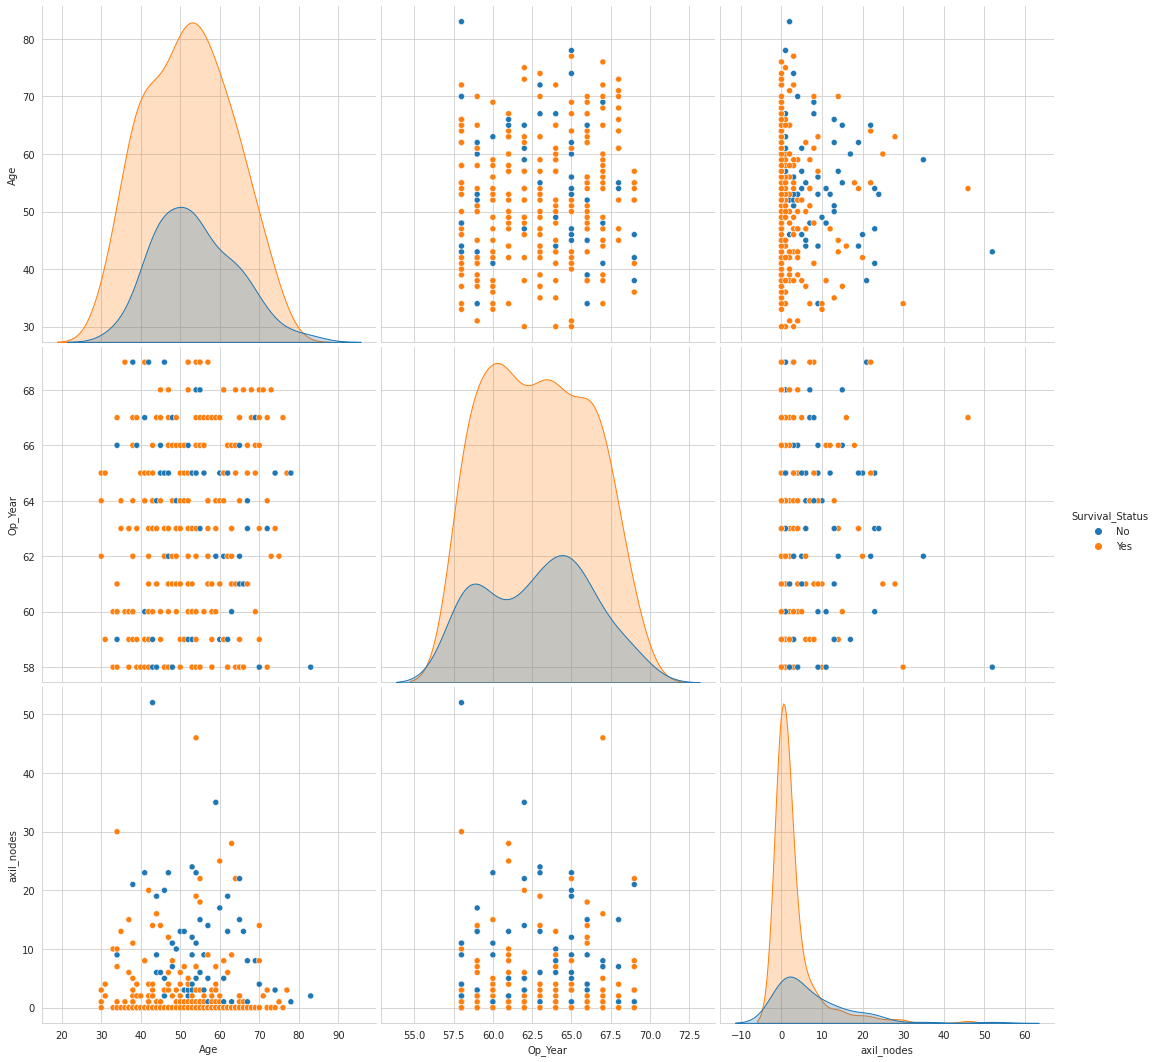

In [ ]:
#Plotting a pair plot
sns.pairplot(haberman, hue= "Survival_Status", size = 5);
plt.show()

**Observations from the above Pair Plot :¶**

1.By scattering the data points between Axillary Nodes and Age we can find that patients having axillary nodes 0 or 1 has the most survival rates.

2.The two classes are impossible to seperate by scattering the data between Age and Operation Year
If we consider the scattered data between the number of axillary nodes and operation year, the two classes are more seperable than other plots. Also if we notice carefully, we can say that the survival rates of patients are highest when they have less than 4 axillary nodes, however there are a some rare few instances where the patients have not survived after 5 years even with less than 4 axillary nodes


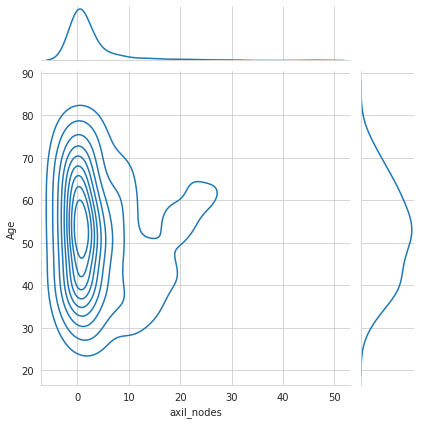

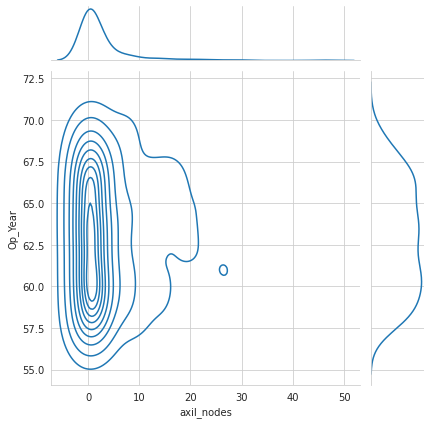

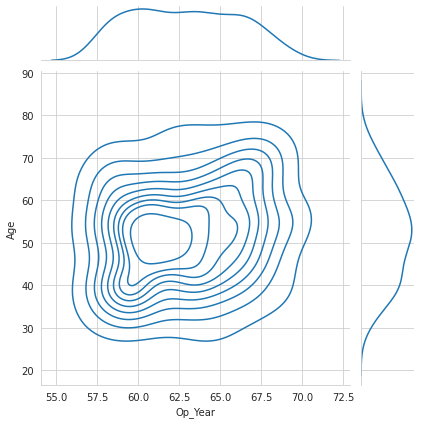

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="axil_nodes", y="Age", data=survival_yes, kind="kde");
plt.show();

#2D Density plot, contors-plot
sns.jointplot(x="axil_nodes", y="Op_Year", data=survival_yes, kind="kde");
plt.show();

#2D Density plot, contors-plot
sns.jointplot(x="Op_Year", y="Age", data=survival_yes, kind="kde");
plt.show();



**Observations from the above 2-D Contour Plot :**

a.It is somewhat possible for us to classify the patients. From the Age vs Operation_Year plot we can make out that most patients who were operated between year 1960 and 1962 and aged 48 to 52, has the highest rate of survival.

b.The survival rates of patients having more than 5 axillary nodes decreses a lot

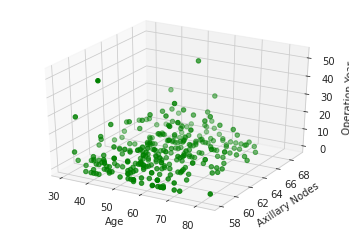

In [ ]:
#3-D Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xs = np.array(haberman['Age']) ;ys = np.array(haberman['Op_Year']) ;zs = np.array(haberman['axil_nodes'])
ax.scatter(xs, ys, zs, zdir = 'z', c = ['g'])
ax.set_xlabel('Age')
ax.set_ylabel('Axillary Nodes')
ax.set_zlabel('Operation Year')
plt.show()

In [ ]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)


Ks_2sampResult(statistic=0.26, pvalue=0.06779471096995852)

In [ ]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


In [ ]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


In [ ]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')
